In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f7743e31ca9b551ade9a8903b568ad0


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | provideniya
Processing Record 3 of Set 1 | kruisfontein
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | poya
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | yuzhnyy
Processing Record 12 of Set 1 | kununurra
Processing Record 13 of Set 1 | inhambane
Processing Record 14 of Set 1 | paradwip
City not found. Skipping...
Processing Record 15 of Set 1 | santa cruz de la palma
Processing Record 16 of Set 1 | talara
Processing Record 17 of Set 1 | faanui
Processing Record 18 of Set 1 | mecca
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | kenai
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2

Processing Record 45 of Set 4 | ambon
Processing Record 46 of Set 4 | bethel
Processing Record 47 of Set 4 | ciudad bolivar
Processing Record 48 of Set 4 | sangar
Processing Record 49 of Set 4 | gannan
Processing Record 50 of Set 4 | bonthe
Processing Record 1 of Set 5 | tigil
Processing Record 2 of Set 5 | isangel
Processing Record 3 of Set 5 | louisbourg
City not found. Skipping...
Processing Record 4 of Set 5 | mesagne
Processing Record 5 of Set 5 | vila velha
Processing Record 6 of Set 5 | maple creek
Processing Record 7 of Set 5 | jambi
Processing Record 8 of Set 5 | zhezkazgan
Processing Record 9 of Set 5 | lolua
City not found. Skipping...
Processing Record 10 of Set 5 | puerto ayora
Processing Record 11 of Set 5 | rio tercero
Processing Record 12 of Set 5 | hambantota
Processing Record 13 of Set 5 | caucaia
Processing Record 14 of Set 5 | bana
Processing Record 15 of Set 5 | zhangjiakou
Processing Record 16 of Set 5 | korla
Processing Record 17 of Set 5 | zagare
Processing Reco

Processing Record 32 of Set 8 | payakumbuh
Processing Record 33 of Set 8 | shchuchye
City not found. Skipping...
Processing Record 34 of Set 8 | havre-saint-pierre
Processing Record 35 of Set 8 | west des moines
Processing Record 36 of Set 8 | dunkirk
Processing Record 37 of Set 8 | miles city
Processing Record 38 of Set 8 | falealupo
City not found. Skipping...
Processing Record 39 of Set 8 | salamanca
Processing Record 40 of Set 8 | camapua
Processing Record 41 of Set 8 | mendi
Processing Record 42 of Set 8 | saiha
Processing Record 43 of Set 8 | kloulklubed
Processing Record 44 of Set 8 | poronaysk
Processing Record 45 of Set 8 | tezu
Processing Record 46 of Set 8 | xiaoweizhai
Processing Record 47 of Set 8 | lincoln
Processing Record 48 of Set 8 | tabialan
City not found. Skipping...
Processing Record 49 of Set 8 | paracuru
Processing Record 50 of Set 8 | marfino
Processing Record 1 of Set 9 | salalah
Processing Record 2 of Set 9 | kunming
Processing Record 3 of Set 9 | clyde river

Processing Record 14 of Set 12 | toftir
City not found. Skipping...
Processing Record 15 of Set 12 | batagay-alyta
Processing Record 16 of Set 12 | banda aceh
Processing Record 17 of Set 12 | vrangel
Processing Record 18 of Set 12 | serpukhov
Processing Record 19 of Set 12 | puerto del rosario
Processing Record 20 of Set 12 | samarkand
Processing Record 21 of Set 12 | mujiayingzi
Processing Record 22 of Set 12 | ballina
Processing Record 23 of Set 12 | wagga wagga
Processing Record 24 of Set 12 | bereda
Processing Record 25 of Set 12 | cianorte
Processing Record 26 of Set 12 | puerto guzman
Processing Record 27 of Set 12 | zhireken
Processing Record 28 of Set 12 | sieghartskirchen
Processing Record 29 of Set 12 | general roca
Processing Record 30 of Set 12 | panguipulli
Processing Record 31 of Set 12 | buluang
Processing Record 32 of Set 12 | thanh hoa
Processing Record 33 of Set 12 | rocha
Processing Record 34 of Set 12 | tamparan
Processing Record 35 of Set 12 | rawlins
Processing Re

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,42.91,70,40,4.61,CL,2022-04-16 14:51:44
1,Provideniya,64.3833,-173.3000,28.56,94,100,15.50,RU,2022-04-16 14:51:44
2,Kruisfontein,-34.0033,24.7314,62.89,64,90,12.57,ZA,2022-04-16 14:51:45
3,Mataura,-46.1927,168.8643,42.85,90,89,1.68,NZ,2022-04-16 14:51:45
4,Poya,-21.3500,165.1500,70.84,80,3,5.08,NC,2022-04-16 14:51:45
5,Bredasdorp,-34.5322,20.0403,63.10,58,33,18.12,ZA,2022-04-16 14:51:45
6,Rikitea,-23.1203,-134.9692,77.00,74,40,15.82,PF,2022-04-16 14:51:46
7,Busselton,-33.6500,115.3333,61.29,67,59,9.84,AU,2022-04-16 14:51:46
8,Bluff,-46.6000,168.3333,49.80,63,66,7.25,NZ,2022-04-16 14:51:47
9,New Norfolk,-42.7826,147.0587,52.92,75,86,2.75,AU,2022-04-16 14:51:47


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

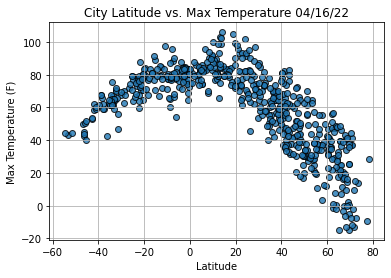

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

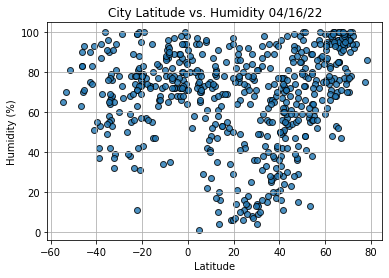

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

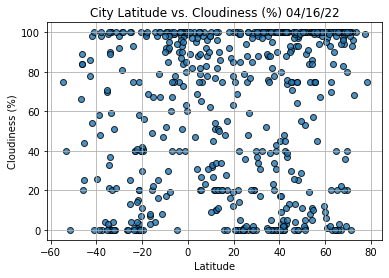

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

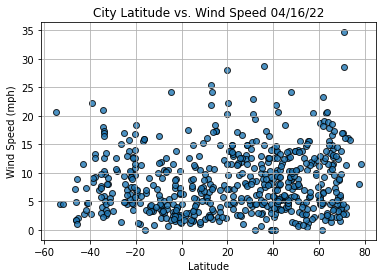

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

# Import linregress
    from scipy.stats import linregress

    # Create a function to create perform linear regression on the weather data
    # and plot a regression line and the equation with the data.
    def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Provideniya,64.3833,-173.3000,28.56,94,100,15.50,RU,2022-04-16 14:51:44
10,Yuzhnyy,53.2542,83.6936,64.78,13,8,4.47,RU,2022-04-16 14:51:47
13,Santa Cruz De La Palma,28.6835,-17.7642,74.14,68,20,14.97,ES,2022-04-16 14:46:49
16,Mecca,21.4267,39.8261,93.11,21,0,13.80,SA,2022-04-16 14:51:49
18,Kenai,60.5544,-151.2583,34.09,86,100,4.61,US,2022-04-16 14:51:49


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

NameError: name 'slope' is not defined